In [71]:
import math
import sympy
from sympy import Symbol, symbols, S, Limit, Derivative, Integral, solve, sin, log, exp, sqrt, pi
from sympy.plotting import plot

In [4]:
sympy.sin(math.pi / 2)

1.00000000000000

In [5]:
theta = Symbol('theta')
u, t, g = symbols('u,t,g')
solve(u * sin(theta) - g * t**2)

[{g: u*sin(theta)/t**2}]

In [6]:
# 関数の極限
x = Symbol('x')
Limit(1/x, x, S.Infinity) # x -> ∞

Limit(1/x, x, oo, dir='-')

In [7]:
# 極限値
l = Limit(1/x, x, S.Infinity)
l.doit()

0

In [8]:
# 連続複利
# (1 + 1/n)^n はeに収束する
n = Symbol('n')
Limit((1 + 1/n)**n, n, S.Infinity).doit()

E

In [9]:
p,r,t = symbols('p,r,t')
Limit(p*(1+r/n)**(n*t), n, S.Infinity).doit()

p*exp(r*t)

In [10]:
# 微分(定義通り、変化の割合の極限として算出)
t = Symbol('t')
st = 5*t**2 + 2*t + 8
t1, dt = symbols('t1,dt')
Limit((st.subs({t: t1 + dt}) - st.subs({t: t1})) / dt, dt, 0).doit()

10*t1 + 2

In [11]:
# 微分(Derivativeクラス)
d = Derivative(st, t)
d.doit()

10*t + 2

In [12]:
# 偏微分
x, y = symbols('x,y')
f = 2*x*y + x*y**2
print('df/dx = {0}'.format(Derivative(f, x).doit()))
print('df/dy = {0}'.format(Derivative(f, y).doit()))

df/dx = y**2 + 2*y
df/dy = 2*x*y + 2*x


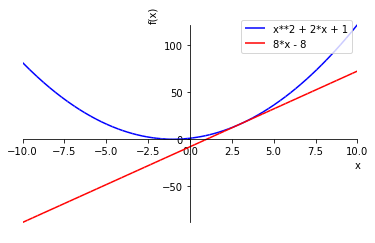

In [13]:
# 微分のプロット
x = Symbol('x')
f  = x**2+2*x+1

# f(x)x=x0での接線を求める
def tangent_line(f, x, x0):
    # 接線 y = a*x + b とすると、aは微分係数なので、bを算出する
    a = Derivative(f, x).doit().subs({x: x0})
    b = (f - a * x).subs({x: x0})
    return a*x + b

# fの接線t
t = tangent_line(f, x, 3)

# fと接線tを描画
p = plot(f, t, legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

In [61]:
#  勾配上昇方でf(x)の極大値を求める(x0は初期値)
# 勾配をθとして、
# θ新 = θ旧 + (step_size) * df / dθ として、更新される大きさがε(e)より小さくなるまで繰り返す
def grad_ascent(f, x, x0):
    e = 1e-3 # 0.001
    step_size = 1e-1 # 0.1
    df = Derivative(f, x).doit()
    # df=0が存在しない場合はε以下になることがないため、アルゴリズムが停止しないのでエラー
    if not solve(df):
        print('Cannot continue, solution for {0}=0 does not exist'.format(df))
        return
    next_step = lambda x0: x0 + step_size * df.subs({x: x0}).evalf()
    x_old = x0
    x_new = next_step(x_old)
    while abs(x_new - x_old) > e:
        x_old = x_new
        x_new = next_step(x_old)
    return x_new

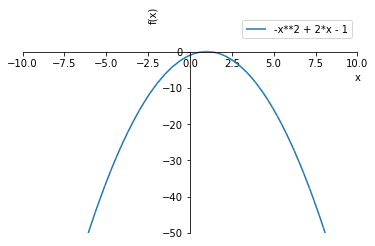

max=(1.00396140812571, -0.0000156927543386587)


In [62]:
f = -x**2+2*x-1 # 最大値は(1, 0)
gx = grad_ascent(f, x, 5)
p = plot(f, xlim=[-10, 10], ylim=[-50, 10], legend=True, show=False)
p.show()
print("max=({0}, {1})".format(gx, f.subs({x: gx})))

In [63]:
grad_ascent(log(x), x, 5)

Cannot continue, solution for 1/x=0 does not exist


In [67]:
# 積分
x, k = symbols('x,k')
Integral(k*x, x).doit()

k*x**2/2

In [68]:
# 定積分
Integral(k*x, (x, 0, 2)).doit()

2*k

In [69]:
Integral(x, (x, 2, 4)).doit()

6

x<|ρ| ρ=1: 0.682689492137086
x<|ρ| ρ=2: 0.954499736103642
x<|ρ| ρ=3: 0.997300203936740
-∞<x<∞: 1.00000000000000


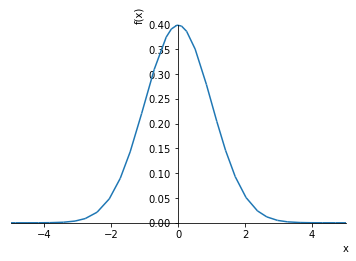

In [86]:
# 標準正規分布の積分
p = exp(-x**2 / 2) / sqrt(2*pi)
print('x<|ρ| ρ=1: {0}'.format(Integral(p, (x, -1, 1)).doit().evalf()))
print('x<|ρ| ρ=2: {0}'.format(Integral(p, (x, -2, 2)).doit().evalf()))
print('x<|ρ| ρ=3: {0}'.format(Integral(p, (x, -3, 3)).doit().evalf()))
print('-∞<x<∞: {0}'.format(Integral(p, (x, S.NegativeInfinity, S.Infinity)).doit().evalf()))
plot(p, xlim=[-5, 5])